<a href="https://colab.research.google.com/github/Raanank10/Rain_in_Australia/blob/elad_20210705/Rain_in_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rain in Australia EDA


In [ ]:
# General tools
import numpy as np
import scipy as sp
import pandas as pd

# SK Learn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import log_loss

# Misc
import warnings
from sys import modules
from time import time

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Confuguration
warnings.filterwarnings('ignore')
%matplotlib inline

# Load Data

In [ ]:
url = 'https://raw.githubusercontent.com/Raanank10/Rain_in_Australia/main/weatherAUS.csv'

data = pd.read_csv(url)
data.head(10)

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0  2008-12-01   Albury     13.4  ...     21.8         No            No
1  2008-12-02   Albury      7.4  ...     24.3         No            No
2  2008-12-03   Albury     12.9  ...     23.2         No            No
3  2008-12-04   Albury      9.2  ...     26.5         No            No
4  2008-12-05   Albury     17.5  ...     29.7         No            No
5  2008-12-06   Albury     14.6  ...     28.9         No            No
6  2008-12-07   Albury     14.3  ...     24.6         No            No
7  2008-12-08   Albury      7.7  ...     25.5         No            No
8  2008-12-09   Albury      9.7  ...     30.2         No           Yes
9  2008-12-10   Albury     13.1  ...     28.2        Yes            No

[10 rows x 23 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
#elad 2021 Jul 05

# Data Cleaning

In [ ]:
data.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [ ]:
unique_data = data.drop_duplicates(inplace=False)
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
unique_data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

what do we do with missing data? ignore or mean or median? I think mean only if the feature is important 

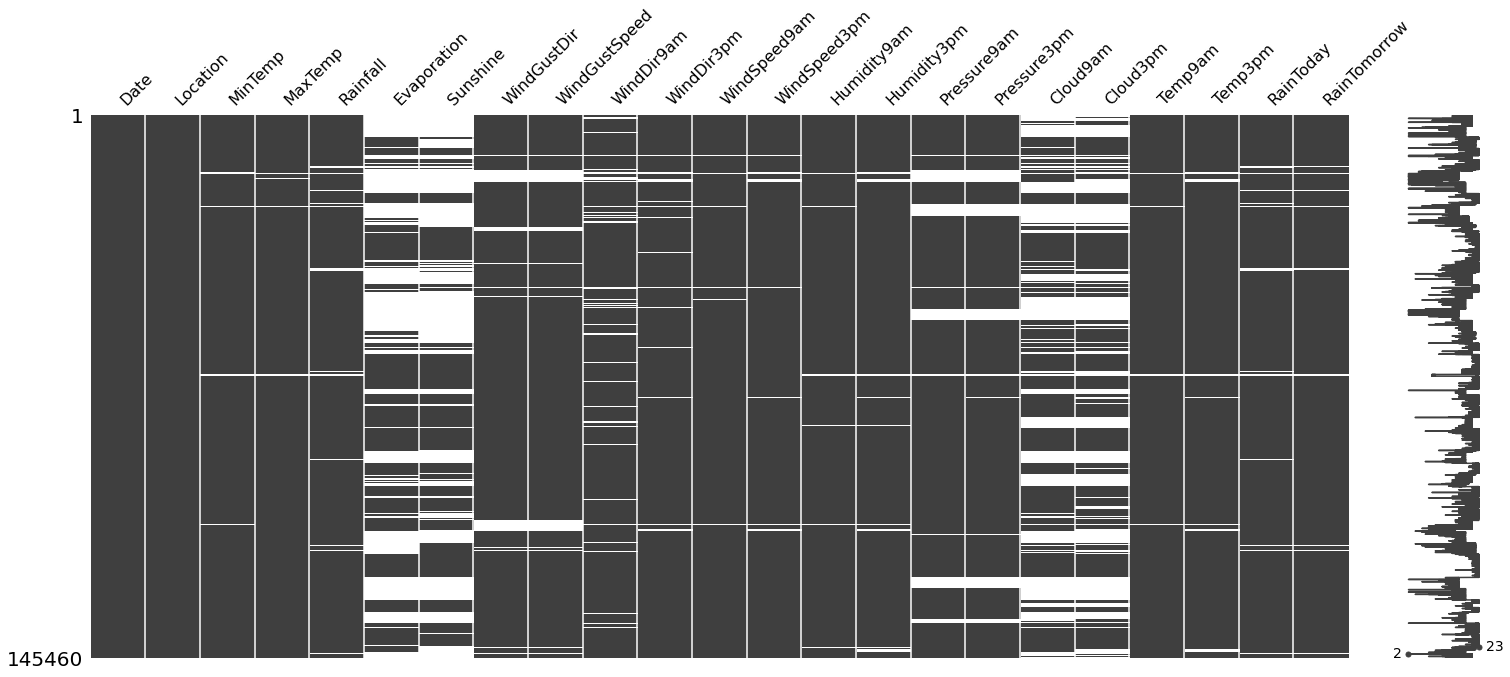

In [ ]:
msno.matrix(data)

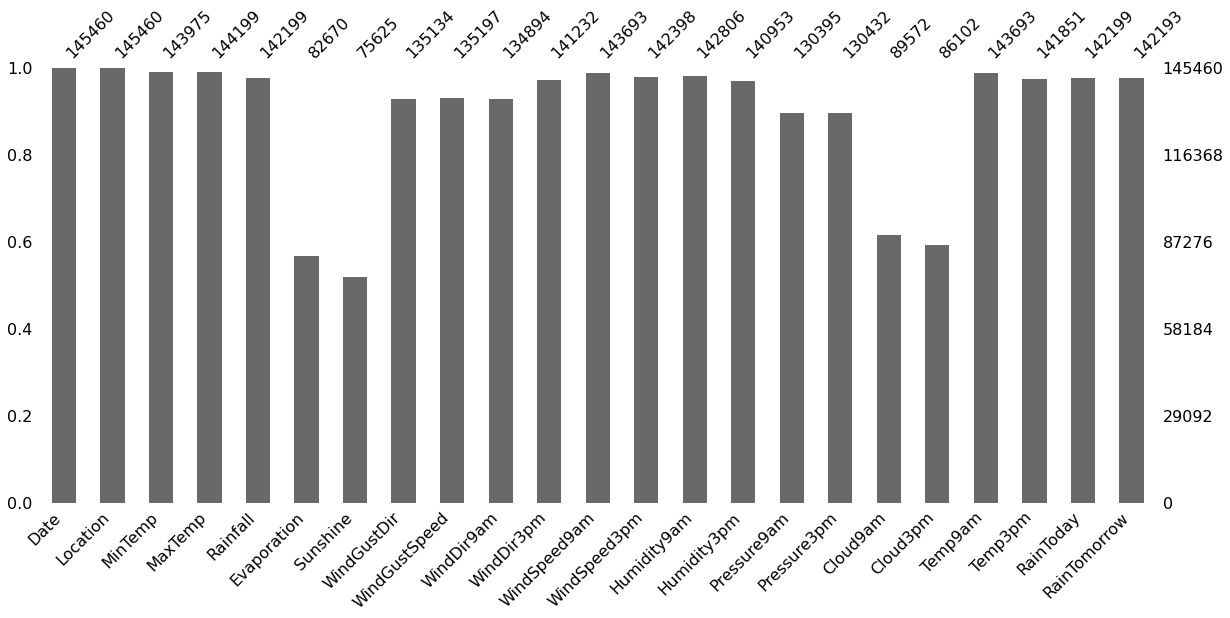

In [ ]:
msno.bar(data, figsize=(20, 8))

In [ ]:
unique_data.describe()

MinTemp        MaxTemp  ...        Temp9am       Temp3pm
count  143975.000000  144199.000000  ...  143693.000000  141851.00000
mean       12.194034      23.221348  ...      16.990631      21.68339
std         6.398495       7.119049  ...       6.488753       6.93665
min        -8.500000      -4.800000  ...      -7.200000      -5.40000
25%         7.600000      17.900000  ...      12.300000      16.60000
50%        12.000000      22.600000  ...      16.700000      21.10000
75%        16.900000      28.200000  ...      21.600000      26.40000
max        33.900000      48.100000  ...      40.200000      46.70000

[8 rows x 16 columns]

## Preprocessing

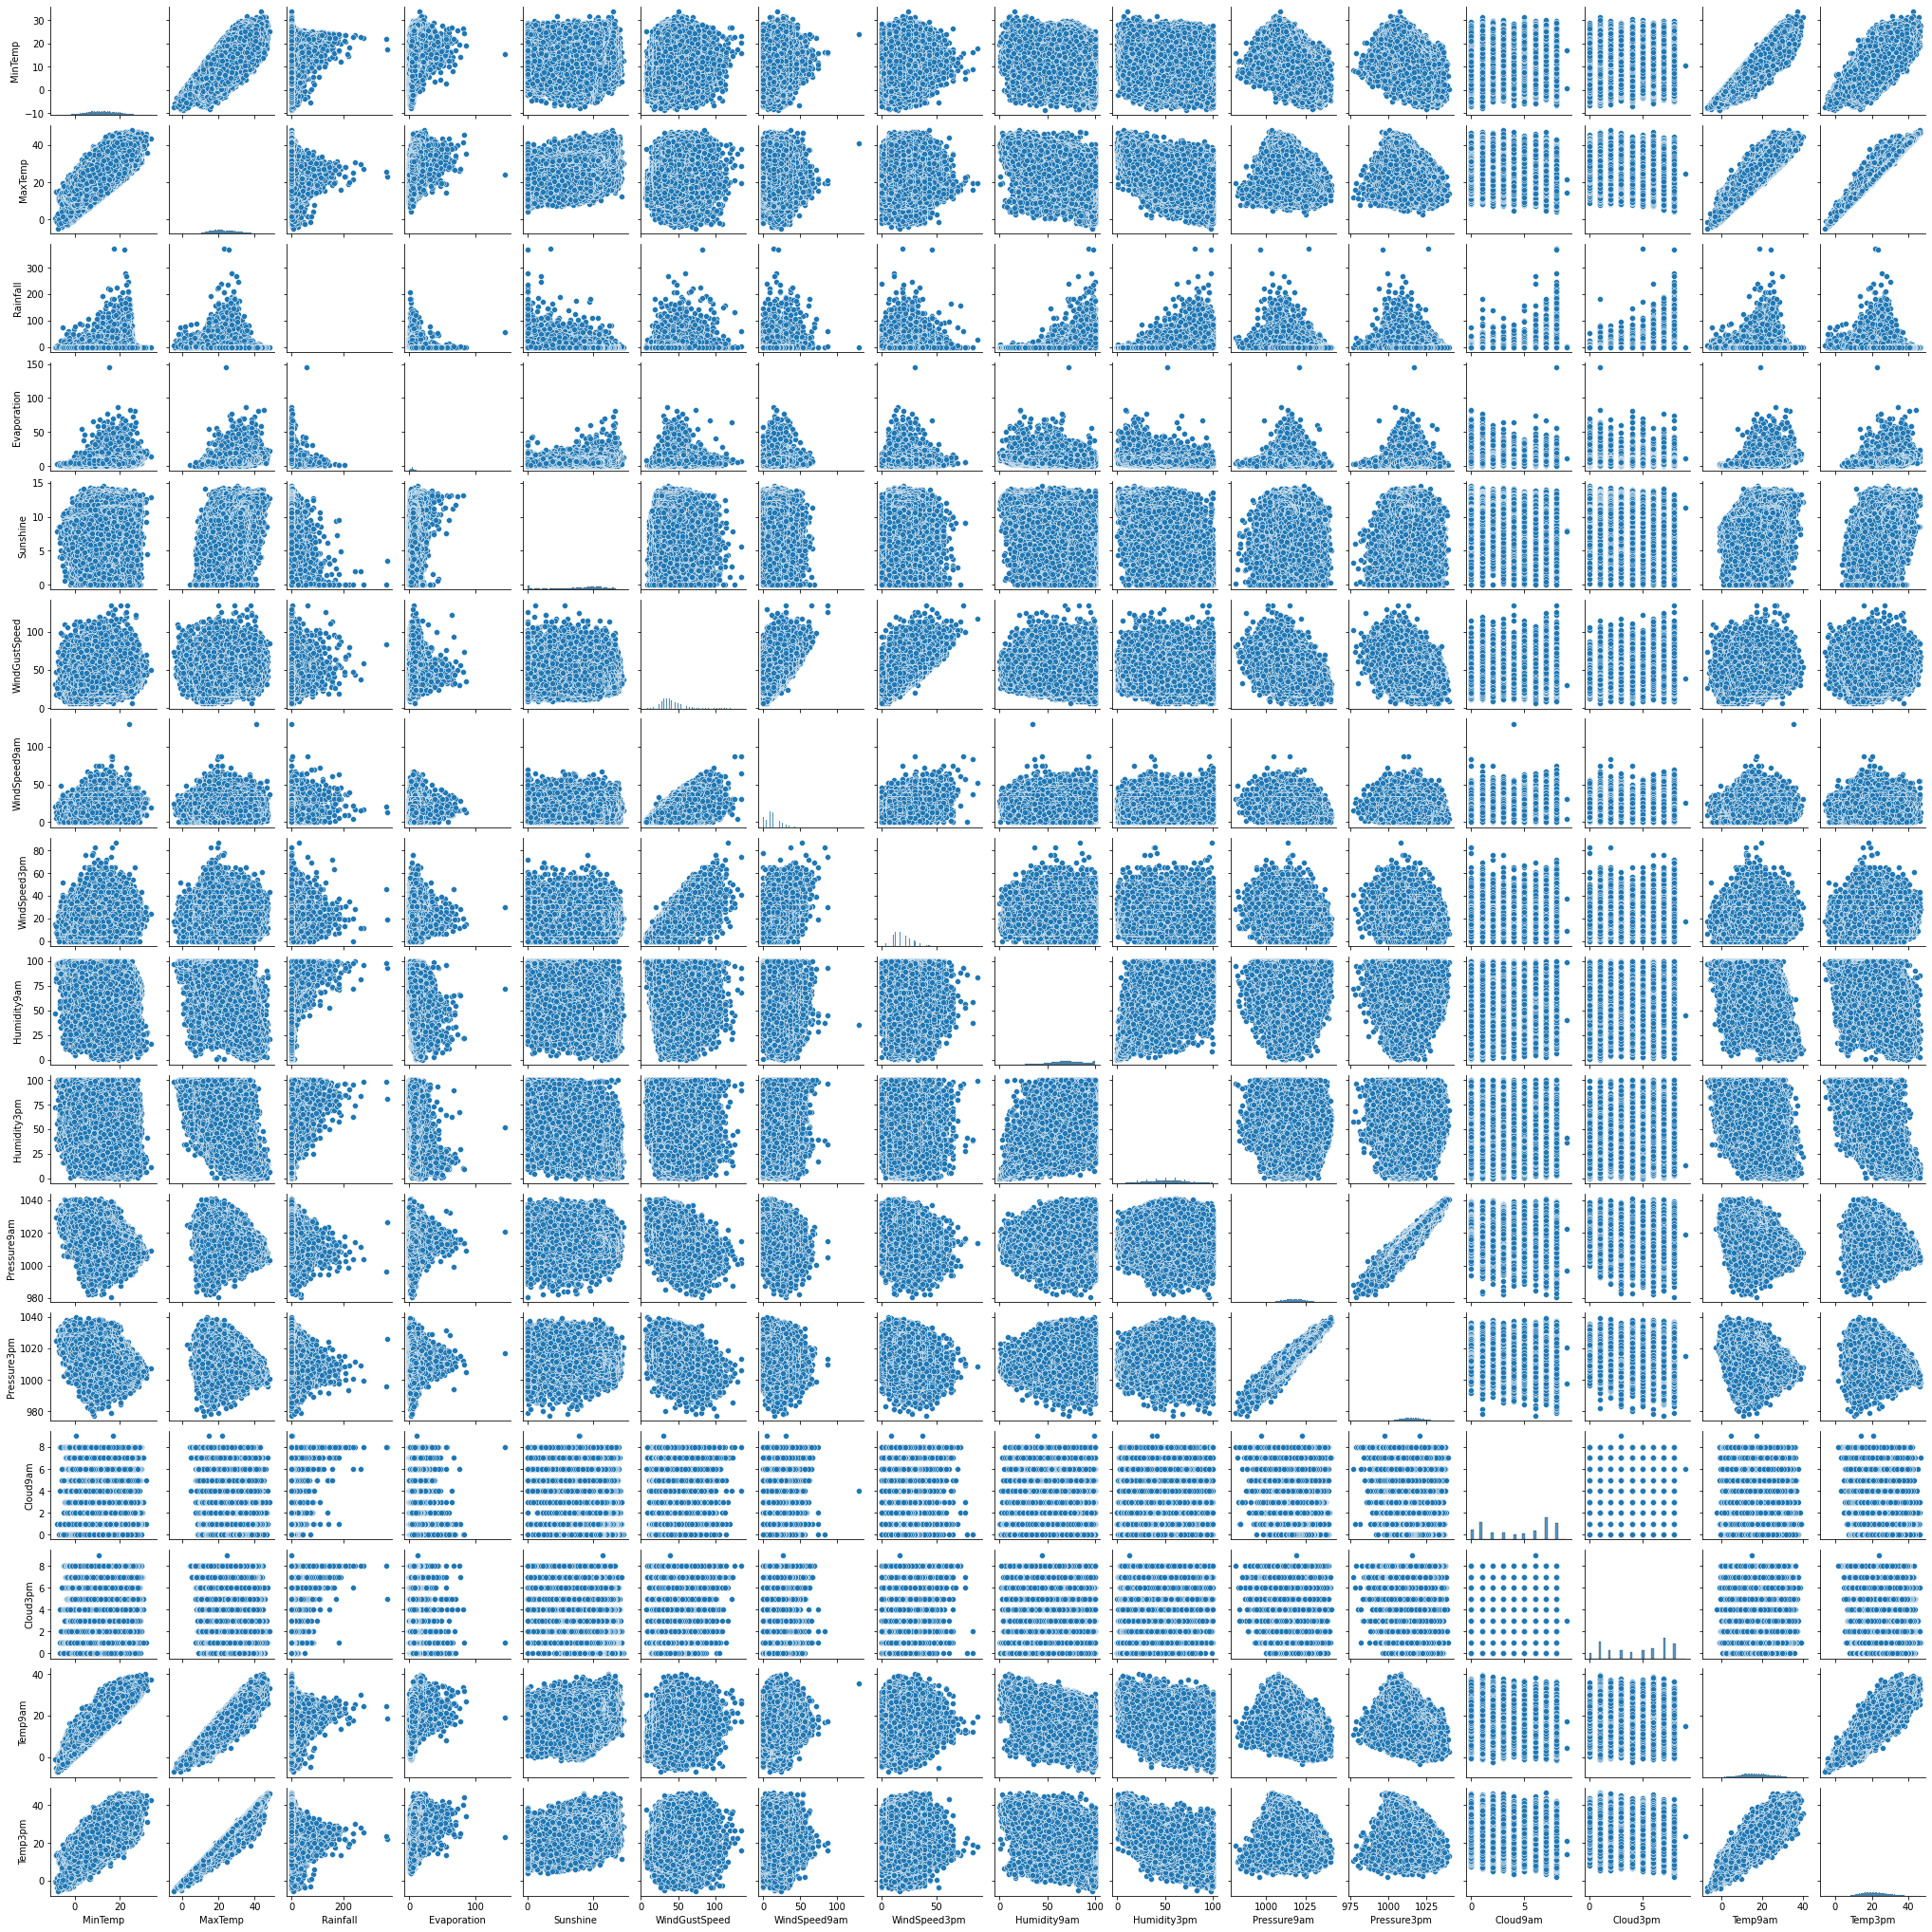

In [ ]:
unique_data = unique_data.select_dtypes(include=np.number)
sns.pairplot(unique_data,height=1.8)

In [ ]:
unique_data.corr()

MinTemp   MaxTemp  Rainfall  ...  Cloud3pm   Temp9am   Temp3pm
MinTemp        1.000000  0.736555  0.103938  ...  0.021605  0.901821  0.708906
MaxTemp        0.736555  1.000000 -0.074992  ... -0.277921  0.887210  0.984503
Rainfall       0.103938 -0.074992  1.000000  ...  0.172403  0.011192 -0.079657
Evaporation    0.466993  0.587932 -0.064351  ... -0.182618  0.545115  0.572893
Sunshine       0.072586  0.470156 -0.227549  ... -0.703930  0.291188  0.490501
WindGustSpeed  0.177415  0.067615  0.133659  ...  0.109168  0.150150  0.032748
WindSpeed9am   0.175064  0.014450  0.087338  ...  0.054639  0.128545  0.004569
WindSpeed3pm   0.175173  0.050300  0.057887  ...  0.025396  0.163030  0.027778
Humidity9am   -0.232899 -0.504110  0.224405  ...  0.357326 -0.471354 -0.498399
Humidity3pm    0.006089 -0.508855  0.255755  ...  0.523120 -0.221019 -0.557841
Pressure9am   -0.450970 -0.332061 -0.168154  ... -0.147861 -0.422556 -0.286770
Pressure3pm   -0.461292 -0.427167 -0.126534  ... -0.084778 -0.470187 -0.389548
Cloud9am       0.078754 -0.289370  0.198528  ...  0.603564 -0.136959 -0.302060
Cloud3pm       0.021605 -0.277921  0.172403  ...  1.000000 -0.126659 -0.317420
Temp9am        0.901821  0.887210  0.011192  ... -0.126659  1.000000  0.860591
Temp3pm        0.708906  0.984503 -0.079657  ... -0.317420  0.860591  1.000000

[16 rows x 16 columns]

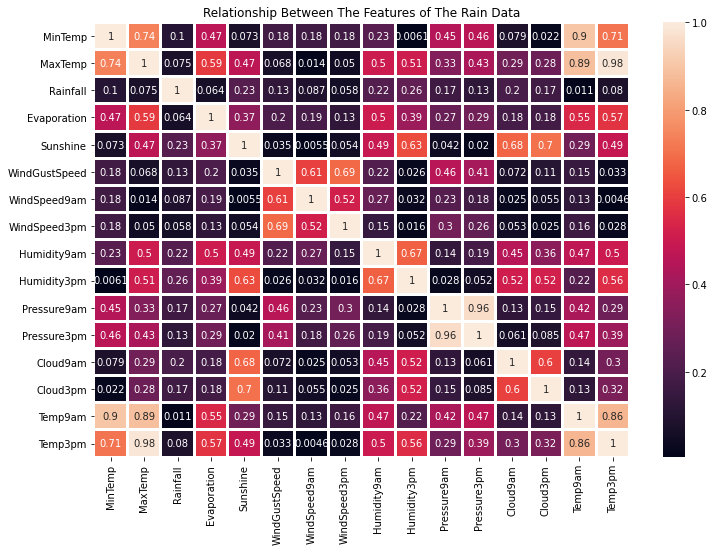

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Relationship Between The Features of The Rain Data")
sns.heatmap(unique_data.corr().abs(), annot=True, linewidths = 2, linecolor = "white")

# Feature Engineering

In [ ]:
data['DiffTemp']=data['MaxTemp']-data['MinTemp']
data.head()

Date Location  MinTemp  ...  RainToday  RainTomorrow  DiffTemp
0  2008-12-01   Albury     13.4  ...         No            No       9.5
1  2008-12-02   Albury      7.4  ...         No            No      17.7
2  2008-12-03   Albury     12.9  ...         No            No      12.8
3  2008-12-04   Albury      9.2  ...         No            No      18.8
4  2008-12-05   Albury     17.5  ...         No            No      14.8

[5 rows x 24 columns]